## Getting Our Data Ready

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\bishw\OneDrive\Desktop\Insurance\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('Data Cleaned Insurance.csv')
data.head()

age  Sex     bmi  children  Smoker  Region      charges
0   19    0  27.900       0.0       1       0  16884.92400
1   18    1  33.770       1.0       0       1   1725.55230
2   28    1  33.000       3.0       0       1   4449.46200
3   33    1  22.705       0.0       0       2  21984.47061
4   32    1  28.880       0.0       0       2   3866.85520

## Importing Dependencies

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge

### Train test Split

In [5]:
X = data.drop(['charges'],axis=1)
y = data['charges']
X.shape , y.shape

((1338, 6), (1338,))

In [6]:
# set random seed
np.random.seed(40)
X_train,X_test , y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2) 

In [7]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

## Standardization

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
prams = {'age':data['age'],
        'bmi':data['bmi'],
        'Region':data['Region']}
X_train_scaled = scale.fit_transform(X_train,prams)
X_test_scaled = scale.fit_transform(X_test,prams)

In [9]:
X_train_scaled.shape

(1070, 6)

In [10]:
X_train_scaled

array([[0.17391304, 1.        , 0.20823245, 0.4       , 0.        ,
        0.        ],
       [0.        , 1.        , 0.38848534, 0.6       , 0.        ,
        1.        ],
       [0.73913043, 0.        , 0.41000807, 0.        , 0.        ,
        0.        ],
       ...,
       [0.63043478, 1.        , 0.32970137, 0.8       , 0.        ,
        1.        ],
       [0.41304348, 0.        , 0.31692225, 0.6       , 0.        ,
        0.66666667],
       [0.13043478, 0.        , 0.19504977, 0.        , 0.        ,
        0.33333333]])

In [11]:
X_test_scaled

array([[0.15217391, 0.        , 0.54702685, 0.2       , 0.        ,
        0.33333333],
       [0.        , 1.        , 0.68473069, 0.        , 1.        ,
        0.33333333],
       [0.5       , 0.        , 0.64948114, 0.4       , 0.        ,
        0.        ],
       ...,
       [0.69565217, 0.        , 0.31922253, 0.2       , 0.        ,
        1.        ],
       [0.13043478, 1.        , 0.20655576, 0.        , 0.        ,
        0.66666667],
       [0.10869565, 1.        , 0.47257453, 0.6       , 1.        ,
        1.        ]])

## Modeling

### RandomForest

In [12]:

rfr = RandomForestRegressor()
# fit the model to the data
rfr.fit(X_train_scaled,y_train)


RandomForestRegressor()

In [13]:
randomforest_score= rfr.score(X_test_scaled,y_test)
randomforest_score

0.8515381914437081

### LinearRegression

In [14]:
reg = LinearRegression()
reg.fit(X_train_scaled,y_train)

LinearRegression()

In [15]:
reg_score = reg.score(X_test_scaled,y_test)
reg_score

0.7332556444605174

### Ridge

In [16]:
rdg = Ridge()
rdg.fit(X_train_scaled,y_train)

Ridge()

In [17]:
rdg_score = rdg.score(X_train_scaled,y_train)
rdg_score

0.754726773274342

## Comparison

In [18]:
model_scores = {'RandomForestScore':randomforest_score,
                'LinearRegression':reg_score,
                'Ridge':rdg_score
               }

In [19]:
df_model_score = pd.DataFrame([model_scores])

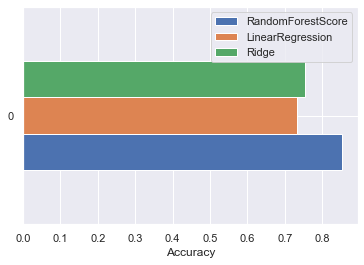

In [20]:
df_model_score.plot.barh();
plt.xlabel('Accuracy');


## **HyperParameter Tunning**
`RandomizedSearchCV` **And** `GridSearchCV`

In [21]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
rfr_grid = {
    'n_estimators':np.arange(10,1000,50),
    'criterion':['squared_error', 'absolute_error', 'poisson'],
    'max_depth':[None,5,8,10],
    'max_features':[ 'sqrt', 'log2', None]
}

In [22]:
# setup hyperparametes for RandomForestRegressor 
rfr_rcv = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions= rfr_grid,
                                n_iter = 50,
                                verbose=2,
                                cv=5)
# fit random hyperparameter search model for linearRegression
rfr_rcv.fit(X_train_scaled,y_train)
                                

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   2.9s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   2.8s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   2.9s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   2.8s
[CV] END criterion=absolute_error, max_depth=None, max_features=sqrt, n_estimators=310; total time=   2.7s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; total time=   1.7s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; total time=   1.8s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; total time=   1.6s
[CV] END criterion=absolute_error, max_depth=10, max_features=log2, n_estimators=210; to

[CV] END criterion=squared_error, max_depth=None, max_features=sqrt, n_estimators=210; total time=   0.3s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   1.4s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   1.4s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   1.3s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   1.4s
[CV] END criterion=poisson, max_depth=8, max_features=None, n_estimators=610; total time=   1.3s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   0.9s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   1.0s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   1.0s
[CV] END criterion=squared_error, max_depth=8, max_features=None, n_estimators=560; total time=   1.

[CV] END criterion=poisson, max_depth=10, max_features=sqrt, n_estimators=860; total time=   1.6s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   2.0s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   2.2s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   1.9s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   2.4s
[CV] END criterion=poisson, max_depth=None, max_features=log2, n_estimators=960; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total time=   4.8s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total time=   4.5s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total time=   4.6s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, n_estimators=810; total

[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=None, max_features=log2, n_estimators=260; total time=   2.4s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   1.5s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   1.6s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   1.9s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   1.7s
[CV] END criterion=poisson, max_depth=None, max_features=None, n_estimators=560; total time=   1.5s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 5, 8, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [23]:
rfr_rcv.best_params_

{'n_estimators': 460,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'poisson'}

In [57]:
rfr_rcv = RandomForestRegressor(n_estimators= 460,
  max_features= None,
  max_depth = 5,
  criterion = 'poisson'
)

In [58]:
rfr_rcv.fit(X_train_scaled,y_train)

RandomForestRegressor(criterion='poisson', max_depth=5, max_features=None,
                      n_estimators=460)

In [59]:
rfr_tuned_score = rfr_rcv.score(X_test_scaled,y_test)
rfr_tuned_score

0.8619558432079724

## **Testing the model**


In [60]:
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error


### R^2 

In [61]:
y_preds = rfr_rcv.predict(X_test_scaled)

In [62]:
y_preds[:10]

array([ 4996.74570257, 38902.0756755 ,  7454.43319133,  9963.34104171,
       16429.00602995,  7213.38317964, 14282.33737665, 19892.55915889,
       11337.01621664, 25795.71999227])

In [63]:
y_true = np.array(y_test)

In [64]:
y_true[:10]

array([ 3227.1211 , 36307.7983 ,  7371.772  ,  8125.7845 , 14571.8908 ,
        7077.1894 , 13607.36875, 20149.3229 ,  9630.397  , 21098.55405])

In [65]:
r2 = r2_score(y_true, y_preds)
r2

0.8619558432079724

### Mean Squared Error

In [66]:
MSE = mean_squared_error(y_true, y_preds, squared=False)
MSE

4542.780355222348

### Mean Absolute Error

In [67]:
MAE = mean_absolute_error(y_true, y_preds)
MAE

2581.128471789585

In [68]:
# visualize the data
metrics_rfr = {
    'MSE':MSE,
    'MAE':MAE
}

In [69]:
df_metrics = pd.DataFrame([metrics_rfr])

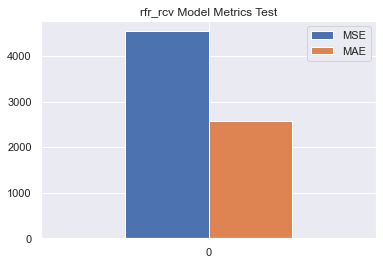

In [70]:
df_metrics.plot.bar()
plt.title('rfr_rcv Model Metrics Test')
plt.xticks(rotation=0);

### Scoring Parameter ( Cross Validation Score)

In [71]:
from sklearn.model_selection import cross_val_score


In [72]:
cval_score = cross_val_score(rfr_rcv, X, y, cv=5)
cval_score

array([0.88102981, 0.79944318, 0.89406072, 0.84597514, 0.87228607])

In [73]:
mean_c_val_score = np.mean(cval_score)
mean_c_val_score

0.8585589844785673

## Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor(random_state=0)
# fit the model to the data
gbr.fit(X_train_scaled,y_train)


GradientBoostingRegressor(random_state=0)

In [42]:
# make prediction with the model
gbr.score(X_test_scaled,y_test)

0.8617434295658586

### GridSearch CV Gradient Boosting

In [75]:
from sklearn.model_selection import GridSearchCV

In [43]:
gbr_grid = {
    'n_estimators':range(20,81,10),
    'max_depth':range(5,16,2),
    'min_samples_split':range(200,1001,200),
    'min_samples_leaf':range(50,1000,100),
    'learning_rate':[0.1,0.2,0.3]
}

In [76]:
gbr_cv =   GridSearchCV(GradientBoostingRegressor(),
                                param_grid= gbr_grid,
                                verbose=2,
                                cv=5)
# fit the model to the data
gbr_cv.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6300 candidates, totalling 31500 fits
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rat

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=250, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_ra

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=150, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learni

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END lea

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=750, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END 

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learn

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, m

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_ra

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=250, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=850, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=950, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, ma

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rat

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_ra

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END lea

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=11, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=150, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END 

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=250, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=450, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=650, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=50, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rat

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=450, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=750, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=5, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_ra

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=350, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=450, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=550, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rat

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=850, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=7, min_samples_leaf=950, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_r

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_ra

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=450, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=550, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=650, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=750, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=850, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=9, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=50, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=150, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END l

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=800, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=350, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learni

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END lear

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=650, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=750, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=11, min_samples_leaf=950, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=50, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=150, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=250, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=350, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=450, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=550, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=650, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=750, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=200, n_estimators=30; total time=   0.0s
[CV] END learn

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=600, n_estimators=30; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=850, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=13, min_samples_leaf=950, min_samples_split=1000, n_estimators=40; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=50, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=150, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=250, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=200, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=350, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=450, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=400, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=550, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=200, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=600, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=800, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=650, min_samples_split=1000, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=200, n_estimators=20; total time=   0.0s
[CV] END le

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=400, n_estimators=80; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=600, n_estimators=20; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=20; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=750, min_samples_split=1000, n_estimators=30; total time=   0.0s
[CV] END

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=30; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=40; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=400, n_estimators=50; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=850, min_samples_split=800, n_estimators=70; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=200, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=600, n_estimators=60; total time=   0.0s
[CV] END learnin

[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END learning_rate=0.3, max_depth=15, min_samples_leaf=950, min_samples_split=1000, n_estimators=60; total time=   0.0s
[CV] END

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': range(5, 16, 2),
                         'min_samples_leaf': range(50, 1000, 100),
                         'min_samples_split': range(200, 1001, 200),
                         'n_estimators': range(20, 81, 10)},
             verbose=2)

In [77]:
gbr_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 7,
 'min_samples_leaf': 50,
 'min_samples_split': 400,
 'n_estimators': 80}

In [82]:
gbr_cv = GradientBoostingRegressor(n_estimators= 80,
 min_samples_split= 400,
 min_samples_leaf = 50,
 max_depth = 7,
 learning_rate = 0.2,
 random_state = 0                                 
)

In [83]:
gbr_cv.fit(X_train_scaled,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=7, min_samples_leaf=50,
                          min_samples_split=400, n_estimators=80,
                          random_state=0)

In [87]:
 aucc = gbr_cv.score(X_test_scaled,y_test)

In [89]:
print(f'GradientBoostingRegressor accuracy is {round(aucc*100,2)}')

GradientBoostingRegressor accuracy is 86.59


## Features Importance

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

In [50]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [51]:
selection.feature_importances_

array([0.12921732, 0.01029205, 0.19427141, 0.02420873, 0.62059197,
       0.02141852])

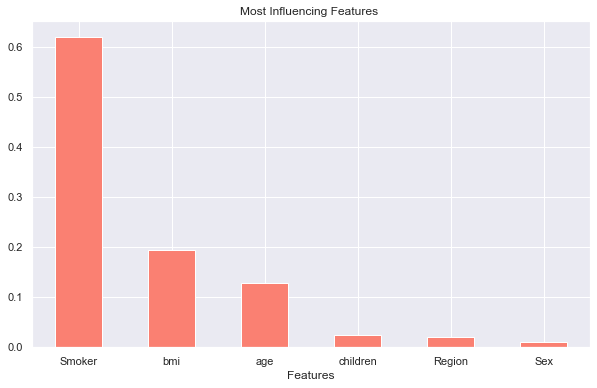

In [52]:
plt.figure(figsize = (10,6))
plt.title("Most Influencing Features ")
plt.xlabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar',color='salmon')
plt.xticks(rotation=0)
plt.show()

## Saving the model

In [85]:
import pickle
with open('GradientBoostingRegressor1','wb') as file:
    pickle.dump(gbr_cv,file)